# Iris Dataset Analysis

In this notebook, we will perform data analysis on the Iris dataset. We will go through the steps of data loading, exploration, transformation, and visualization.

## Step 1: Setting up the Environment

In this step, we will import the necessary libraries and load the Iris dataset.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris_data = pd.read_csv(url, header=None, names=column_names)

# Preview the data
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Step 2: Data Exploration

Here, we will explore the dataset by checking for missing values and getting basic statistics.

In [2]:
missing_values = iris_data.isnull().sum()
missing_values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [3]:
iris_stats = iris_data.describe()
iris_stats

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Visualizing Feature Distributions

We will visualize the distribution of each feature in the dataset.

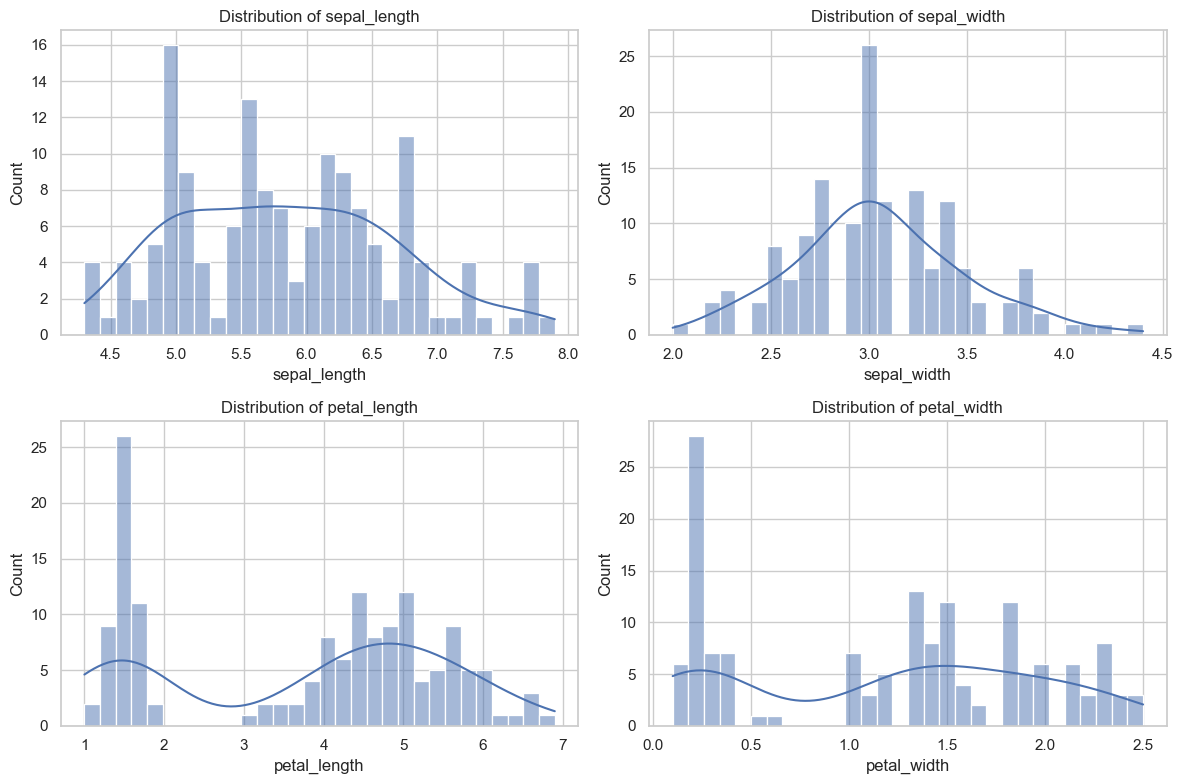

In [4]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(iris_data.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(iris_data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

## Step 3: Data Transformation

In this step, we will create new features and encode categorical data.

In [5]:
iris_data['petal_area'] = iris_data['petal_length'] * iris_data['petal_width']
iris_data['sepal_area'] = iris_data['sepal_length'] * iris_data['sepal_width']

# Convert species names to numerical categories using get_dummies
iris_data_encoded = pd.get_dummies(iris_data, columns=['species'], drop_first=False)

# Preview the encoded data
iris_data_encoded.head()

,sepal_length,sepal_width,petal_length,petal_width,petal_area,sepal_area,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
0,5.1,3.5,1.4,0.2,0.28,17.85,True,False,False
1,4.9,3.0,1.4,0.2,0.28,14.70,True,False,False
2,4.7,3.2,1.3,0.2,0.26,15.04,True,False,False
3,4.6,3.1,1.5,0.2,0.30,14.26,True,False,False
4,5.0,3.6,1.4,0.2,0.28,18.00,True,False,False


## Step 4: Data Analysis

We will analyze correlations between numeric features and visualize pairwise relationships.

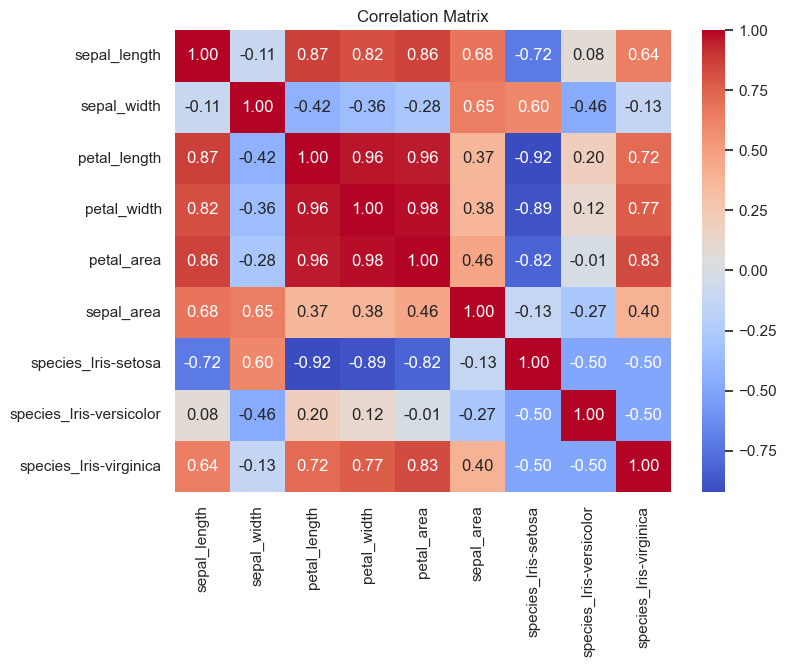

In [6]:
correlation_matrix = iris_data_encoded.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Pairwise Relationships

We will visualize pairwise relationships in the dataset.

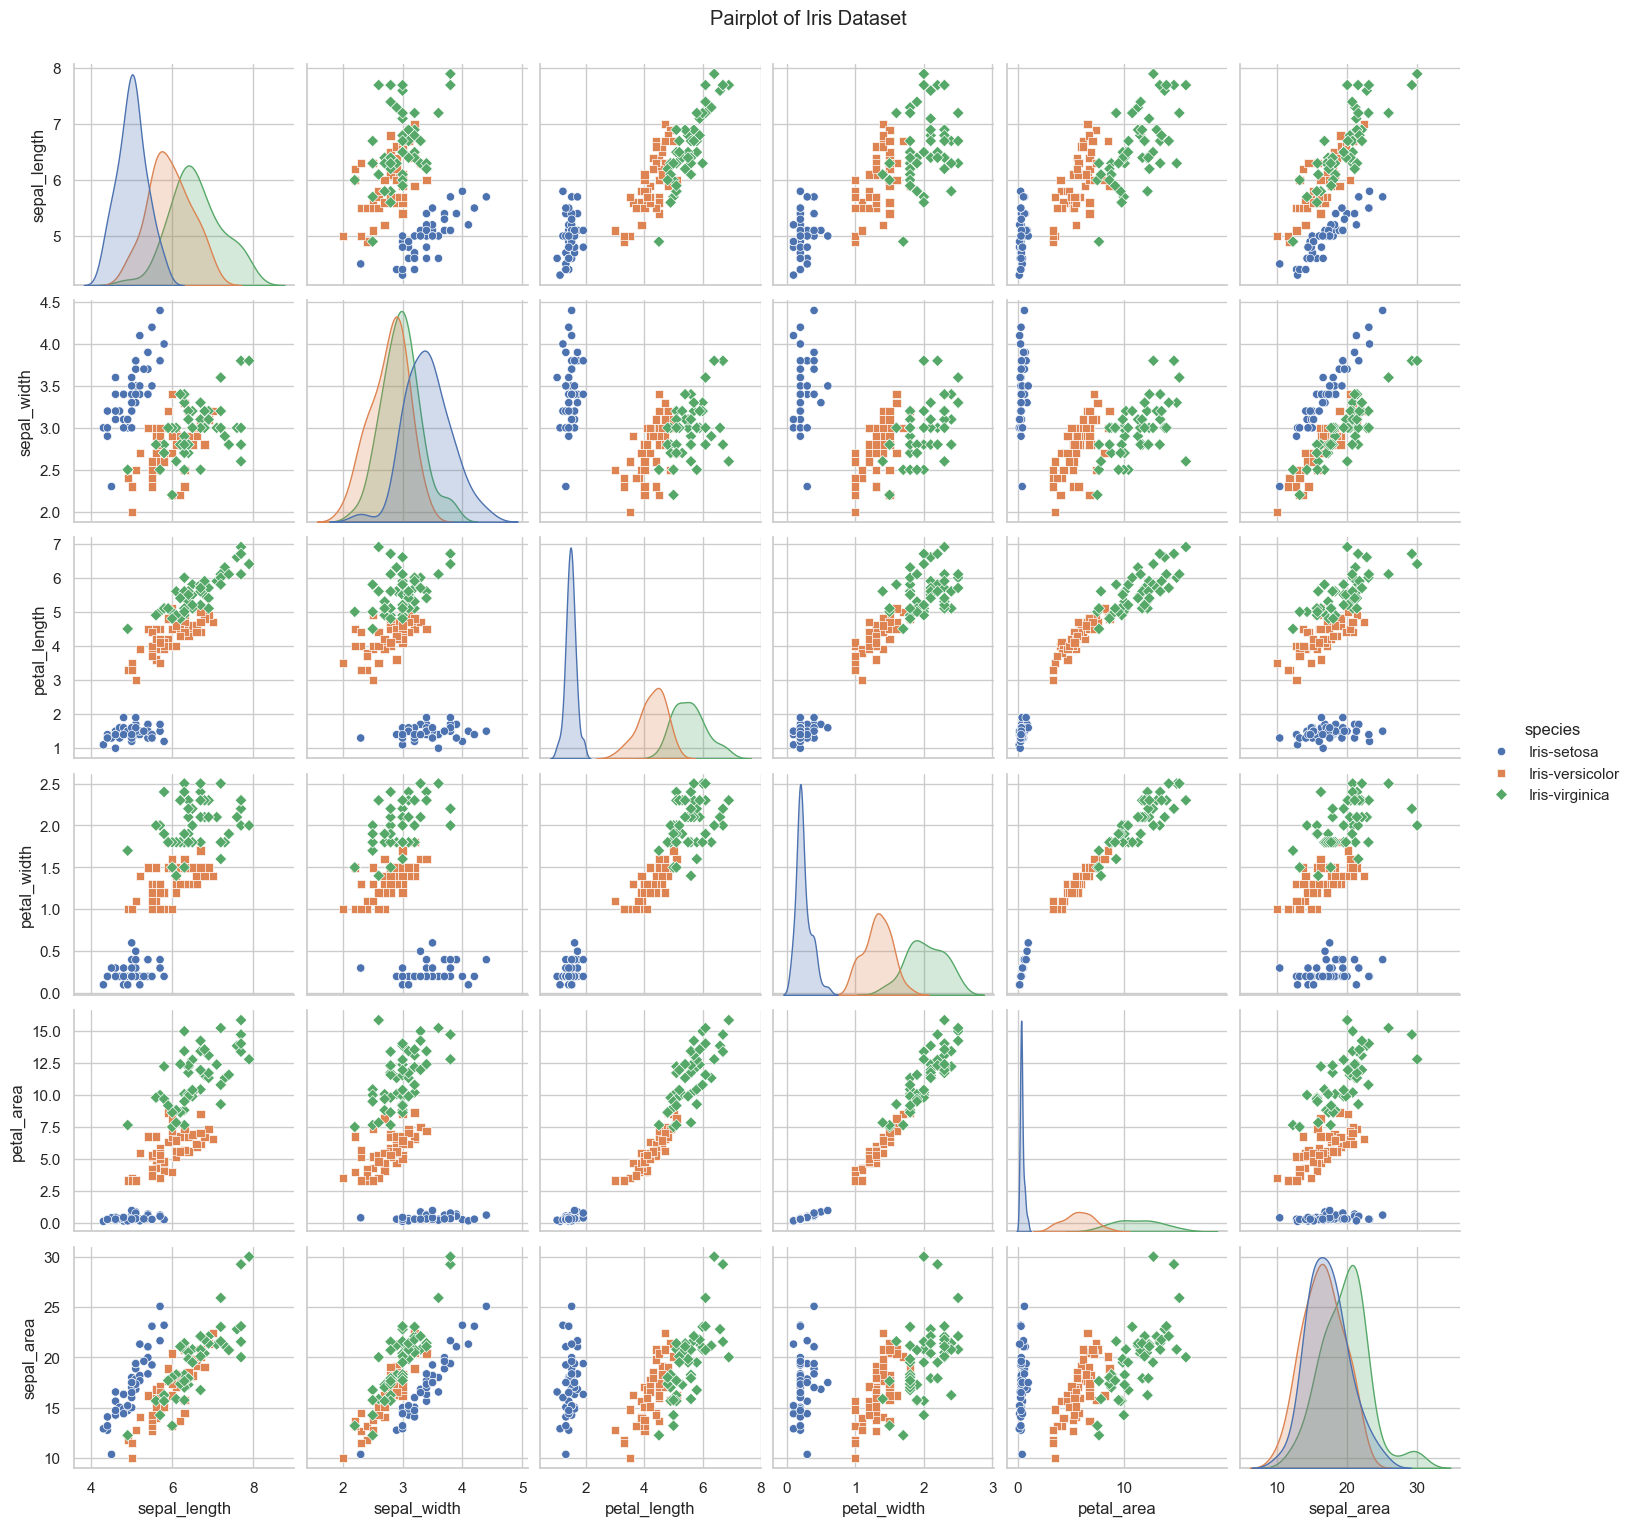

In [7]:
sns.pairplot(iris_data, hue='species', markers=['o', 's', 'D'], diag_kind='kde')
plt.suptitle('Pairplot of Iris Dataset', y=1.02)
plt.show()

### Petal and Sepal Area Comparison by Species

We will compare average petal area by species.

In [8]:
iris_data['petal_area'] = iris_data['petal_length'] * iris_data['petal_width']
iris_data['sepal_area'] = iris_data['sepal_length'] * iris_data['sepal_width']

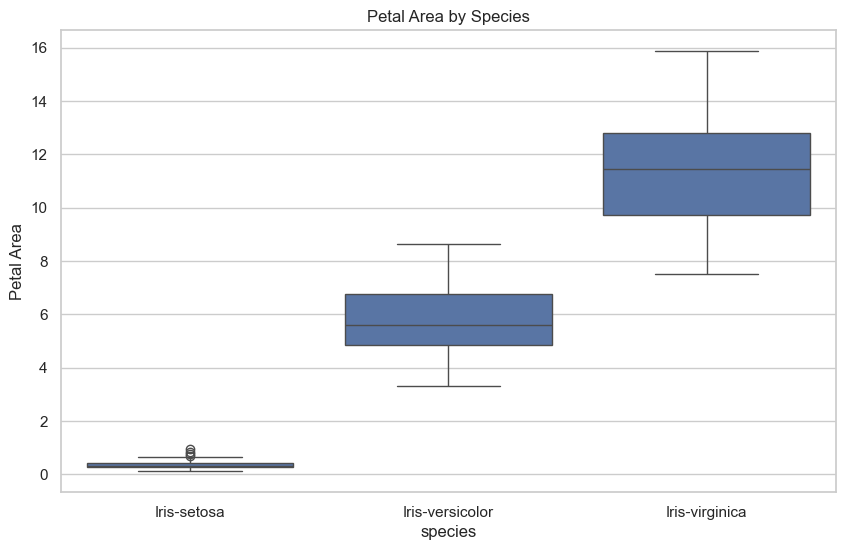

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal_area', data=iris_data)
plt.title('Petal Area by Species')
plt.ylabel('Petal Area')
plt.show()

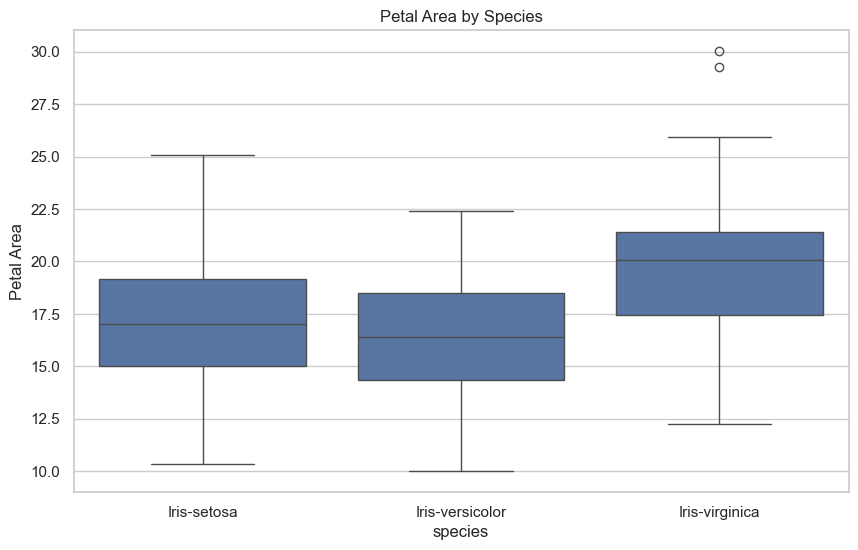

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='sepal_area', data=iris_data)
plt.title('Petal Area by Species')
plt.ylabel('Petal Area')
plt.show()

## Step 5: Conclusion

In this step, we summarize the findings from our analysis.

In [11]:
summary = '''
- The petal and sepal areas show significant variations among different species.
- The Iris Setosa species generally has smaller petal and sepal sizes compared to Iris Versicolor and Iris Virginica.
- The correlation matrix indicates strong correlations between petal length and petal width.
'''
print(summary)


- The petal and sepal areas show significant variations among different species.
- The Iris Setosa species generally has smaller petal and sepal sizes compared to Iris Versicolor and Iris Virginica.
- The correlation matrix indicates strong correlations between petal length and petal width.

